Last update: May 21st, 2025


## QLT electrostatic secondary instabilities (quasi-perpendicular)
#### V. Roytershteyn and G. L. Delzanno. *Nonlinear coupling of whistler waves to oblique electrostatic turbulence enabled by cold plasma*. Physics of Plasmas, 28(4):042903, 04 2021

Author: Opal Issan (oissan@ucsd.edu)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import wofz 
import scipy

In [2]:
# import for plotting purposes
%matplotlib inline
import matplotlib
font = {'family' : 'serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

In [3]:
# important basic functions 
def Z(z):
    # plasma dispersion function Z(xi)
    return 1j * np.sqrt(np.pi) * wofz(z)
    
def Z_prime(z):
    # derivative of the plasma dispersion function Z'(xi)
    return -2*(1+z*Z(z))

def I(Lambda_e, m):
    # modified Bessel function of the first kind I_{m}(\lambda) x exp(-lambda)
    return scipy.special.ive(m, Lambda_e)

def J(Lambda_e, m):
    # Bessel function of the first kind J_{m}(\lambda)
    return scipy.special.jv(m, Lambda_e)

## Electrostatic perpendicular QLT + reduced dispersion relation equations


We proceed to normalize the physical quantities as follows:
\begin{align*}
   t &\coloneqq t^{d}|\Omega_{ce}|, \qquad \omega \coloneqq \frac{\omega^{d}}{|\Omega_{ce}|}, \qquad k_{\perp} \coloneqq d_{e} k_{\perp}^{d}, \qquad \omega_{pe} \coloneqq \frac{\omega_{pe}^{d}}{|\Omega_{ce}|}, \qquad \alpha_{\perp c} \coloneqq \frac{\alpha_{\perp c}^{d}}{d_{e} |\Omega_{ce}|}, \qquad  \mathcal{E}_{E}(k_{\perp}, t) \coloneqq \frac{|\delta \vec{\hat{E}}(k_{\perp}, t)|^2}{d_{e}^3 \Omega_{ce}^2 m_{e} n_{e}}, \\
   T_{\perp c} &\coloneqq \frac{T_{\perp c}^{d}}{d_{e}^2 \Omega_{ce}^2 m_{e}}, \qquad n_{c} \coloneqq \frac{n_{c}^{d}}{n_{e}}, \qquad \mathcal{E}_{B}(k_{\|}, t) \coloneqq \frac{|\delta \vec{\hat{B}}(k_{\|}, t)|^2}{d_{e}^3 \Omega_{ce}^2 m_{e} n_{e}}, \qquad K_{\perp c} \coloneqq \frac{K_{\perp c}^{d}}{d_{e}^2 \Omega_{ce}^2 m_{e} n_{e}},
\end{align*}
leading to
\begin{align*}
    \frac{\mathrm{d} K_{\perp c}(t)}{\mathrm{d} t} &=  -\frac{1}{2\pi} \int_{0}^{\infty} \mathrm{d} k_{\perp} \mathcal{E}_{E}(k_{\perp}, t) \mathrm{Im} \left\{\omega - \frac{\omega}{k_{\perp}^2} \frac{\omega_{pi}^2}{\alpha_{i}^2} J^2_{m*}\left(\frac{k_{\perp} |V_{Dc}|}{ \omega_{0}}\right) Z{'}\left(\frac{\omega + m_{*} \omega_{0}}{k_{\perp} \alpha_{i}}\right)\right\}\\
    \partial_{t} \mathcal{E}_{E}(k_{\perp}, t)  &= 2 \mathrm{Im}\{\omega\}  \mathcal{E}_{E}(k_{\perp}, t) \\
    \partial_{t} \int_{0}^{\infty} \mathrm{d} k_{\|}  \mathcal{E}_{B}(k_{\|}, t) &= - \frac{2}{\frac{\omega_{0}^2}{k_{\|0}^2\omega_{pe}^2} + 1} \int_{0}^{\infty} \mathrm{d} k_{\perp} \mathcal{E}_{E}(k_{\perp}, t) \mathrm{Im} \left\{ \frac{\omega}{k_{\perp}^2} \frac{\omega_{pi}^2}{\alpha_{i}^2} J^2_{m*}\left(\frac{k_{\perp} |V_{Dc}|}{ \omega_{0}}\right) Z{'}\left(\frac{\omega + m_{*} \omega_{0}}{k_{\perp} \alpha_{i}}\right)\right\}\\
    \frac{\mathrm{d} |V_{Dc}(t)|^2}{\mathrm{d} t} &= \frac{1}{4\pi} \left[\frac{\omega_{0}}{k_{\|0}}\frac{1}{\omega_{0} -1} \right]^2 \partial_{t} \int_{0}^{\infty} \mathrm{d} k_{\|}  \mathcal{E}_{B}(k_{\|}, t)\\
    k_{\perp}^2 - 4 n_{c} \frac{\omega_{pe}^2}{\alpha_{\perp c}^2} &\sum_{n=1}^{\infty}\exp(-\lambda_{c}) I_{n}(\lambda_{c}) \left[ \frac{n^2}{\omega^2 - n^2 }\right] = \frac{\omega_{pi}^2}{\alpha_{i}^2} \left|J_{m^{*}}\left(\frac{k_{\perp} |V_{Dc}|}{\omega_{0}}\right)\right|^2 Z'\left(\frac{\omega + m^{*}\omega_{0}}{k_{\perp} \alpha_{i}}\right) \\
    \lambda_{c} &= \frac{k_{\perp}^2 \alpha_{\perp c}^2}{2} 
\end{align*}

In [4]:
def dKdt(omega_pi, alpha_i, E_vec, k_vec, omega_vec, dk, omega_0, v_0, m_star=-3):
    rhs = np.zeros(len(k_vec))
    for ii in range(len(k_vec)):
        ions = ion_response(omega_pi=omega_pi, alpha_i=alpha_i, m_star=m_star, 
                            omega=omega_vec[ii], omega_0=omega_0, k_perp=k_vec[ii], v_0=v_0)
        rhs[ii] = E_vec[ii] * (omega_vec[ii] * (1 - ions/(k_vec[ii]**2))).imag
    return -(1/(2*np.pi)) * np.sum((rhs[:-1] + rhs[1:]) * 0.5 * dk)  # trapezoidal rule

def dEdt(gamma, E_vec):
    return 2 * gamma * E_vec
    
def dBdt(omega_pi, alpha_i, E_vec, k_vec, omega_vec, dk, omega_0, v_0, k_0, m_star=-3):
    rhs = np.zeros(len(k_vec))
    for ii in range(len(k_vec)):
        ions = ion_response(omega_pi=omega_pi, alpha_i=alpha_i, m_star=m_star, 
                            omega=omega_vec[ii], omega_0=omega_0, k_perp=k_vec[ii], v_0=v_0)
        rhs[ii] = E_vec[ii] * (omega_vec[ii] * ions/(k_vec[ii]**2)).imag
    const = (omega_0**2)/((k_0**2) * (omega_pe**2)) + 1
    return -(2/const) * np.sum((rhs[:-1] + rhs[1:]) * 0.5 * dk)  # trapezoidal rule

def dVdt(omega_0, k_0, omega_pi, alpha_i, E_vec, k_vec, omega_vec, dk, v_0, m_star=-3):
    const = (omega_0/k_0/(omega_0-1))**2
    return 1/4/np.pi * const * dBdt(omega_pi=omega_pi, alpha_i=alpha_i, E_vec=E_vec, 
                                    k_vec=k_vec, omega_vec=omega_vec, dk=dk, omega_0=omega_0, v_0=v_0, k_0=k_0, m_star=m_star)

def sum_bessel(lambda_, omega, n_max=50):
    res = 0 
    for n in range(1, n_max):
        res += I(m=n, Lambda_e=lambda_) * (n**2) / (omega**2 - n**2)
    return res

def ion_response(omega_pi, alpha_i, m_star, omega, omega_0, k_perp, v_0):
    a = k_perp * np.abs(v_0) / omega_0
    return (omega_pi**2)/(alpha_i**2) * (J(m=m_star, Lambda_e=a)**2) * Z_prime((omega + m_star*omega_0)/(k_perp*alpha_i))

def cold_electron_response(k_perp, omega, n_max, omega_pe, alpha_perp_c, n_c):
    lambda_ =  (k_perp*alpha_perp_c/np.sqrt(2))**2
    return -n_c * 4 * (omega_pe**2) /(alpha_perp_c**2) * sum_bessel(lambda_=lambda_, omega=omega, n_max=n_max)
    
def disp_k(k_perp, omega_pe, omega_pi, v_0, alpha_i, alpha_perp_c, n_c, m_star=-3, n_max=50):
    return lambda omega : k_perp**2\
                         + cold_electron_response(k_perp=k_perp, omega=omega, n_max=n_max, omega_pe=omega_pe, alpha_perp_c=alpha_perp_c, n_c=n_c) \
                         - ion_response(omega_pi=omega_pi, alpha_i=alpha_i, m_star=m_star, v_0=v_0, omega=omega, omega_0=omega_0, k_perp=k_perp)

In [5]:
def get_omega_vec(k_vec, omega_pe, omega_pi, v_0, alpha_i, alpha_perp_c, n_c):
    omega_vec = np.zeros(len(k_vec), dtype="complex128")
    for ii, kk in enumerate(k_vec):
        ic1 = 1.5 +1E-3j
        ic2 = 1. + 1E-4j
        try:
            omega_vec[ii] = scipy.optimize.newton(disp_k(k_perp=kk, omega_pe=omega_pe, 
                                                     omega_pi=omega_pi, v_0=v_0, alpha_i=alpha_i, 
                                                     alpha_perp_c=alpha_perp_c, n_c=n_c), ic1, tol=1e-15)
        except:
            try:
                omega_vec[ii] = scipy.optimize.newton(disp_k(k_perp=kk, omega_pe=omega_pe, 
                                                         omega_pi=omega_pi, v_0=v_0, alpha_i=alpha_i, 
                                                         alpha_perp_c=alpha_perp_c, n_c=n_c), ic2, tol=1e-15)
            except:
                omega_vec[ii] = 0
    return omega_vec

In [6]:
def dydt(t, f, k_vec, omega_pe, omega_pi, k_0, alpha_i, n_c, dk, omega_0):
    # dispersion solver
    omega_vec = get_omega_vec(k_vec=k_vec, omega_pe=omega_pe, omega_pi=omega_pi, v_0=v_0, 
                          alpha_i=alpha_i, alpha_perp_c=np.sqrt(2*f[0]/n_c), n_c=n_c)

    # omega_vec = np.zeros(len(omega_vec_temp), dtype="complex128")
    # omega_vec[np.where(omega_vec_temp.imag > 0)] = omega_vec_temp[np.where(omega_vec_temp.imag > 0)]
    
    # cold electron kinetic energy 
    rhs_K = dKdt(omega_pi=omega_pi, alpha_i=alpha_i, E_vec=f[3:], k_vec=k_vec, omega_vec=omega_vec, dk=dk, 
                 omega_0=omega_0, v_0=np.sqrt(f[2]))

    # electrostatic electric energy
    rhs_E = dEdt(gamma=omega_vec.imag, E_vec=f[3:])

    # magnetic energy whistler
    rhs_B = dBdt(omega_pi=omega_pi, alpha_i=alpha_i, E_vec=f[3:], k_vec=k_vec, omega_vec=omega_vec, dk=dk, 
                 omega_0=omega_0, v_0=np.sqrt(f[2]), k_0=k_0)

    # drift magnitude of cold electrons
    rhs_V = dVdt(omega_0=omega_0, k_0=k_0, omega_pi=omega_pi, alpha_i=alpha_i, E_vec=f[3:], k_vec=k_vec, omega_vec=omega_vec,
                 dk=dk, v_0=np.sqrt(f[2]))

    print("t = ", t)
    print("max gamma = ", np.max(omega_vec.imag))
    return np.concatenate(([rhs_K], [rhs_B], [rhs_V], rhs_E))

In [102]:
# normalization 
# time is normalized to the electron cyclotron frequency 1/Omega_ce
# space is normalized to electron inertial length d_e
n_c = 4/5 # n^e_0
omega_0 = 0.5 # Omega_ce
k_0 = 1 # d_e
dB0 = 4*np.pi * (1e-4) # d_{e}^3 Omega_{ce}^2 m_{e} n_{e}

omega_pe = 4 # Omgea_{ce}
alpha_perp_c = 0.0079 # d_e x Omega_ce
alpha_i =  0.0079 / np.sqrt(1836) # d_e x Omega_ce

v_0 = 0.65 * 0.0079 # d_e x Omega_ce
omega_pi = omega_pe / np.sqrt(1836) # Omega_ce

# initial conditions
E0 = 1e-10
K0 = (alpha_perp_c**2 / 2) * n_c

# k vector
k_vec = np.linspace(176, 220, 150)
dk = np.abs(k_vec[1] - k_vec[0])

# max time 
t_max = 300

In [103]:
dB0 

0.0012566370614359172

In [104]:
# Determine k-range
omega_ = get_omega_vec(k_vec=k_vec, omega_pe=omega_pe, omega_pi=omega_pi, v_0=v_0, 
                          alpha_i=alpha_i, alpha_perp_c=alpha_perp_c, n_c=n_c)

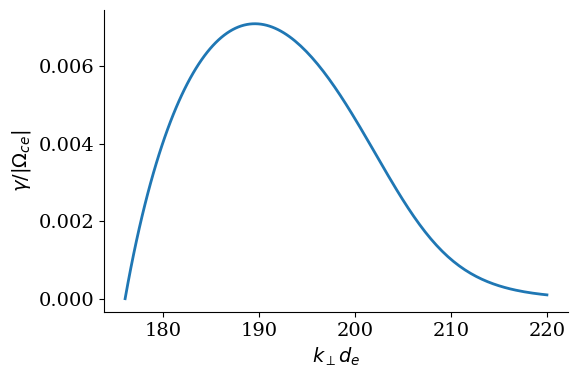

In [105]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(k_vec, omega_.imag, linewidth=2)
ax.set_xlabel("$k_{\perp} d_{e}$")
ax.set_ylabel("$\gamma/|\Omega_{ce}|$")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()

In [106]:
dE_init = E0 * np.ones(len(k_vec))

# simulate 
result = scipy.integrate.solve_ivp(fun=dydt, t_span=[0, t_max], 
                                   y0=np.concatenate(([K0], [dB0], [v_0**2], dE_init)), 
                                   args=(k_vec, omega_pe, omega_pi, k_0, alpha_i, n_c, dk, omega_0),
                                   atol=1e-10, rtol=1e-10, 
                                   method='BDF')

t =  0.0
max gamma =  0.007081140149495189
t =  1743.9948790138262
max gamma =  0.006733319916652646
t =  0.0
max gamma =  0.007081140149495189
t =  0.0
max gamma =  0.007081140006411815
t =  0.0
max gamma =  0.007081140149495189
t =  0.0
max gamma =  0.007081140149495189
t =  0.0
max gamma =  0.007081140149495189
t =  0.0
max gamma =  0.007081140149495189
t =  0.0
max gamma =  0.007081140149495189
t =  0.0
max gamma =  0.007081140149495189
t =  0.0
max gamma =  0.007081140149495189
t =  0.0
max gamma =  0.007081140149495189
t =  0.0
max gamma =  0.007081140149495189
t =  0.0
max gamma =  0.007081140149495189
t =  0.0
max gamma =  0.007081140149495189
t =  0.0
max gamma =  0.007081140149495189
t =  0.0
max gamma =  0.007081140149495189
t =  0.0
max gamma =  0.007081140149495189
t =  0.0
max gamma =  0.007081140149495189
t =  0.0
max gamma =  0.007081140149495189
t =  0.0
max gamma =  0.007081140149495189
t =  0.0
max gamma =  0.007081140149495189
t =  0.0
max gamma =  0.007081140149495

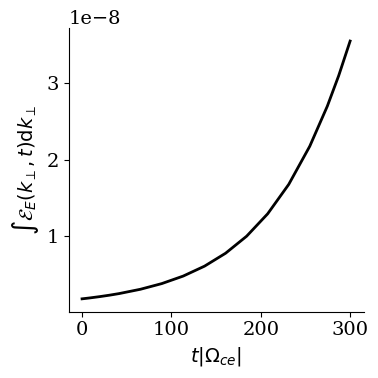

In [107]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(result.t, np.sum(result.y[3:, :], axis=0)*dk/(8*np.pi), color="black", linewidth=2)
ax.set_xlabel(r'$t|\Omega_{ce}|$')
ax.set_ylabel(r'$\int \mathcal{E}_{E}(k_{\perp}, t) \mathrm{d} k_{\perp}$')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()

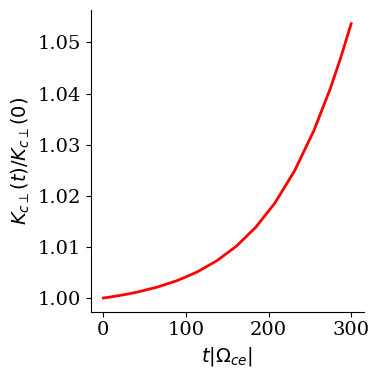

In [108]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(result.t, result.y[0, :]/result.y[0, 0], color="red", linewidth=2)

ax.set_xlabel("$t|\Omega_{ce}|$")
ax.set_ylabel(r"$K_{c\perp}(t)/K_{c\perp}(0)$")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()

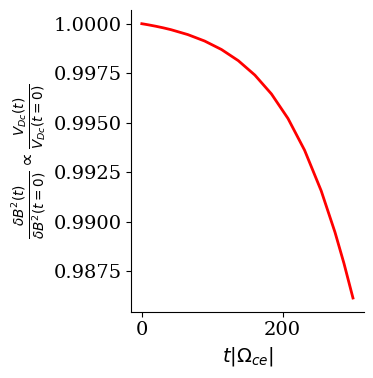

In [109]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(result.t, result.y[1, :]/result.y[1, 0], color="red", linewidth=2)

ax.set_xlabel("$t|\Omega_{ce}|$")
ax.set_ylabel(r"$\frac{\delta B^2(t)}{\delta B^2(t=0)} \propto \frac{V_{Dc}(t)}{V_{Dc}(t=0)}$")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()

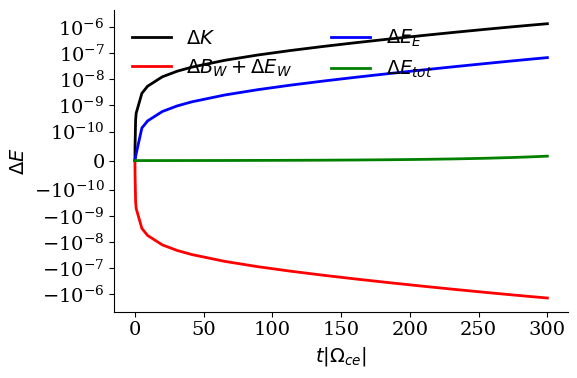

In [110]:
fig, ax = plt.subplots(figsize=(6, 4))
kinetic_energy = result.y[0, :]
potential_energy = np.sum(result.y[3:, :], axis=0)*dk/(4*np.pi)
magnetic_energy = (1 + (omega_0/k_0/omega_pe)**2) * result.y[1, :]/(4*np.pi) 
total_energy = kinetic_energy + magnetic_energy + potential_energy 

ax.plot(result.t, kinetic_energy - kinetic_energy[0], color="black", linewidth=2, label="$\Delta K$")
ax.plot(result.t, magnetic_energy - magnetic_energy[0], color="red", linewidth=2, label="$\Delta B_{W} + \Delta E_{W}$")
ax.plot(result.t, potential_energy - potential_energy[0], color="blue", linewidth=2, label="$\Delta E_{E}$")
ax.plot(result.t, total_energy - total_energy[0], color="green", linewidth=2, label="$\Delta E_{tot}$")

ax.set_yscale("symlog", linthresh=1e-10)
ax.set_xlabel(r'$t|\Omega_{ce}|$')
ax.set_ylabel(r'$\Delta E$')

legend = ax.legend(loc='upper left', ncols=2, fancybox=False, shadow=False, fontsize=14)
legend.get_frame().set_alpha(0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()

Text(0.5, 1.0, '$\\mathcal{E}_{E}(k_{\\perp}, t)$')

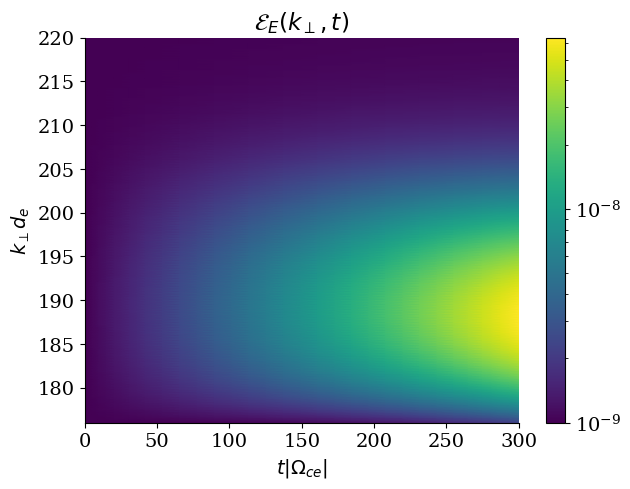

In [111]:
fig, ax = plt.subplots(figsize=(7, 5))
pos = ax.pcolormesh(result.t, k_vec, result.y[3:], cmap="viridis", 
                    norm=matplotlib.colors.LogNorm(), shading='gouraud')
cbar = fig.colorbar(pos)

ax.set_xlabel(r'$t|\Omega_{ce}|$')
ax.set_ylabel(r'$k_{\perp} d_{e}$')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_title(r"$\mathcal{E}_{E}(k_{\perp}, t)$")